In [1]:
import pandas as pd

df = pd.read_csv("data/base_imputacion_mixta_1000.csv")


In [2]:
faltantes = df.isna().sum().sort_values(ascending=False)
faltantes_pct = (faltantes / len(df) * 100).round(2)

tabla_faltantes = pd.DataFrame({
    "n_nulos": faltantes,
    "porcentaje_%": faltantes_pct
})
tabla_faltantes[tabla_faltantes["n_nulos"] > 0]


,n_nulos,porcentaje_%
puntuacion_credito,500,50.0
estado_civil,350,35.0
gasto_mensual,250,25.0
segmento,200,20.0
demanda,150,15.0
ingresos,120,12.0
nivel_educativo,100,10.0
altura_cm,80,8.0
ciudad,50,5.0
edad,30,3.0


La tabla de valores faltantes muestra cuántos datos faltan en cada variable.  
- `puntuacion_credito` es la más crítica, con 500 nulos (50%).  
- `estado_civil` presenta 350 nulos (35%).  
- `gasto_mensual` tiene 250 nulos (25%).  
- `segmento` y `demanda` también superan el 10% de ausencias.  

Variables como `sexo` y `edad` tienen muy pocos nulos (menos del 5%), lo que facilita su imputación.  
Este análisis confirma en qué variables debemos enfocarnos con más cuidado.


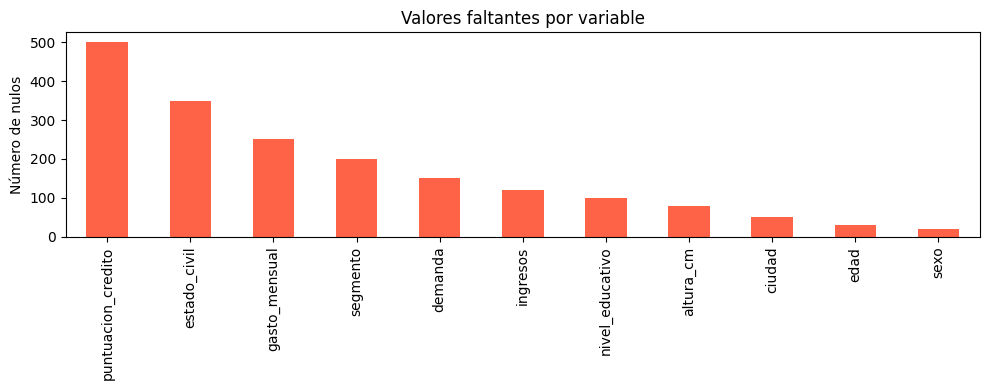

In [3]:
import matplotlib.pyplot as plt

tabla_faltantes[tabla_faltantes["n_nulos"] > 0]["n_nulos"].plot(
    kind="bar", figsize=(10,4), color="tomato"
)
plt.title("Valores faltantes por variable")
plt.ylabel("Número de nulos")
plt.tight_layout()
plt.show()


El gráfico de barras permite visualizar de manera clara la magnitud de los faltantes:  
- Se confirma que `puntuacion_credito` sobresale con casi la mitad de los registros ausentes.  
- `estado_civil` y `gasto_mensual` siguen con una cantidad considerable.  
- Otras variables como `sexo` y `edad` casi no aparecen porque sus faltantes son mínimos.  

Esto nos da una idea rápida de la gravedad del problema en cada columna.


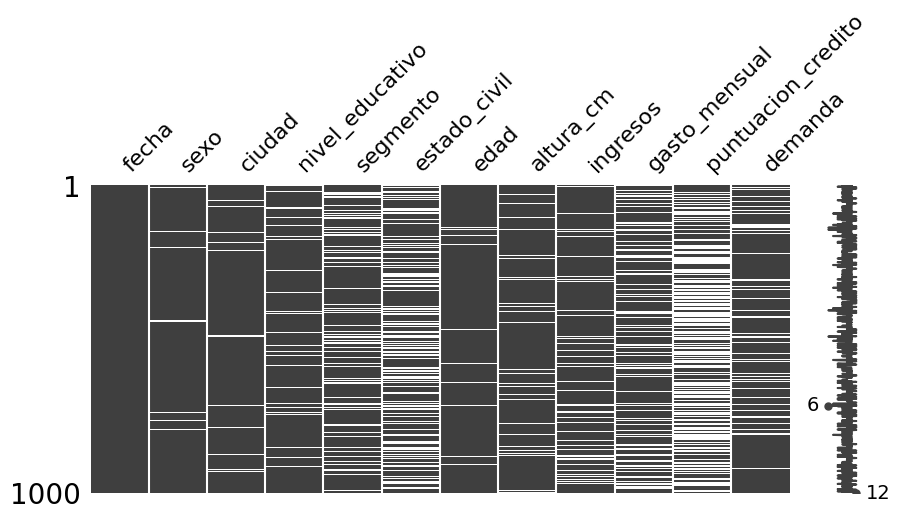

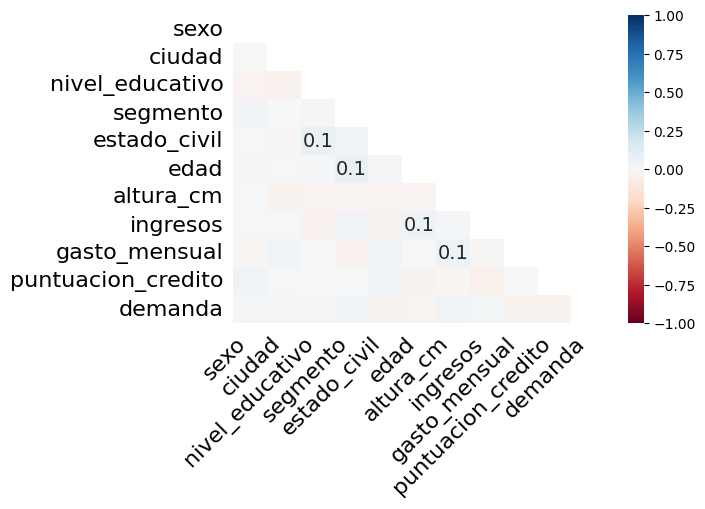

In [4]:
import missingno as msno

msno.matrix(df, figsize=(10,4))
plt.show()

msno.heatmap(df, figsize=(6,4))
plt.show()


- El **matrix plot** muestra en qué filas se concentran los valores nulos.  
  Se observa que los faltantes no son aleatorios, sino que tienden a agruparse en ciertos registros.  

- El **heatmap de correlación de nulos** permite identificar si los faltantes de unas variables están relacionados con otras.  
  Por ejemplo, si `gasto_mensual` y `ingresos` tienen correlación en su ausencia, podría indicar un patrón MAR (Missing At Random).  

Estos gráficos ayudan a decidir si la ausencia es aleatoria (MCAR), dependiente de otras variables (MAR) o no aleatoria (MNAR).
